Практикум №8 <br> Дисципліна: Обробка та аналіз БМД <br> Студент: Збаровський Дмитро <br> Група: БС-81

Завдання
1. Розрахувати та вивести у вигляді таблиці статистичні характиристики даних (середні та стандартні відхилення для кожної з груп).
2. Побудувати графік розкиду в групах.
3. Побудувати функцію, що реалізовує однофакторний дисперсійний аналіз.
4. Вивести результати розрахунку кожного з етапів вказаних вище у вигляді таблиці.
5. Перевірити результат роботи функції на реальних або сгенерованих даних. Зробити висновок.

In [248]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [249]:
data = pd.DataFrame({
    "Group 1": [3,6,2,7,5,1,1],
    "Group 2": [38,15,5,77,13,45,57],
    "Group 3": [57,1,6,8,29,5,8],
})
data

,Group 1,Group 2,Group 3
0,3,38,57
1,6,15,1
2,2,5,6
3,7,77,8
4,5,13,29
5,1,45,5
6,1,57,8


Розрахувати та вивести у вигляді таблиці статистичні характиристики даних (середні та стандартні відхилення для кожної з груп).

In [254]:
table = pd.DataFrame({},index=["Cереднє груп","Стандартні відхилення груп"])
for i in range(len(data.columns)):
    table["Group " +str(i+1)] = [np.mean(data.iloc[:,i]),np.std(data.iloc[:,i])]
table

,Group 1,Group 2,Group 3
Cереднє груп,3.571429,35.714286,16.285714
Стандартні відхилення груп,2.258770,24.311751,18.606560


Побудувати графік розкиду в групах

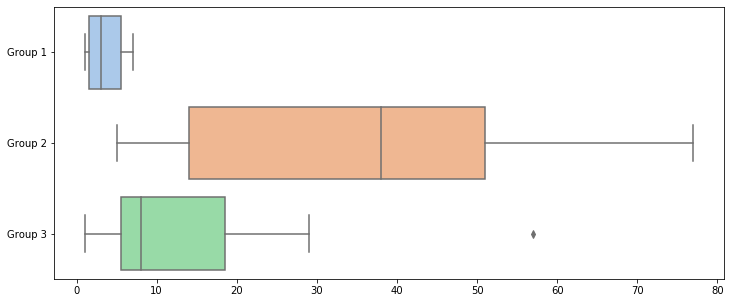

In [251]:
fig, ax = plt.subplots(figsize=(12,5))
fig =  sns.boxplot(orient = "h",data = data, palette="pastel")

Побудувати функцію, що реалізовує однофакторний дисперсійний аналіз.

In [252]:
def dispersia(data):
    n = data.shape[0]
    T1 = sum(data.iloc[:,0])
    T2 = sum(data.iloc[:,1])
    T3 = sum(data.iloc[:,2])
    xi2 = 0
    sumxi = 0
    
    c = data.shape[1]
    N = n * c
    Tsum2 = pow(T1, 2) + pow(T2, 2) + pow(T3, 2)

    dfact = c - 1 
    dzagal = N - 1
    
    sumXi2 = (T1 + T2 + T3) ** 2
    const = sumXi2 / N
    SSfact = Tsum2 / n - const
    
    for i in range (c):
        for j in range(len(data.iloc[:,i-1])):
            sumxi += (data.iloc[j][i])**2
            
    SSzagal = sumxi - const
    SSvipadk = SSzagal - SSfact
    dvipadk = dzagal - dfact
    MSfact = SSfact / dfact
    MSvipadk = SSvipadk / dvipadk
    
    Femp = MSfact / MSvipadk
    Fkrit = pd.read_excel("Fisher.xlsx").iloc[dvipadk,dfact]
    
    print("SSфакт ", SSfact)
    print("SSзаг  ", SSzagal)
    print("SSвип  ", SSvipadk)
    print("dфакт  ", dfact)
    print("dзаг   ", dzagal)
    print("dвип   ", dvipadk)
    print("MSфакт ", MSfact)
    print("MSвип  ", MSvipadk)
    print("Fемпір ", Femp)
    print("Fкрит  ", Fkrit)
    
    if(Femp >= Fkrit):
        result = "Нульова гіпотеза про рівність середніх відхиляється, рівність середніх не підтверджена"
    else:
        result = "Нульова гіпотеза про рівність середніх приймається, рівність середніх підтверджена"
    return result

Вивести результати розрахунку кожного з етапів вказаних вище у вигляді таблиці.<br>
Перевірити результат роботи функції на реальних або сгенерованих даних. Зробити висновок.

In [253]:
dispersia(data)

SSфакт  3668.666666666666
SSзаг   10265.238095238095
SSвип   6596.571428571429
dфакт   2
dзаг    20
dвип    18
MSфакт  1834.333333333333
MSвип   366.47619047619054
Fемпір  5.005327442827441
Fкрит   3.5


'Нульова гіпотеза про рівність середніх відхиляється, рівність середніх не підтверджена'